In [ ]:
'''
【课程3.6】  基本图表绘制 plt.plot()

图表类别：线形图、柱状图、密度图，以横纵坐标两个维度为主
同时可延展出多种其他图表样式

plt.plot(kind='line', ax=None, figsize=None, use_index=True, title=None, grid=None, legend=False, 
style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, 
rot=None, fontsize=None, colormap=None, table=False, yerr=None, xerr=None, label=None, secondary_y=False, **kwds)

'''

In [1]:
# 导包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 魔法函数
%matplotlib inline

2000-01-01    -1.221171
2000-01-02     0.565258
2000-01-03    -1.040357
2000-01-04    -1.999923
2000-01-05    -1.631132
                ...    
2002-09-22    35.567683
2002-09-23    35.757061
2002-09-24    34.953210
2002-09-25    34.192935
2002-09-26    35.502130
Freq: D, Length: 1000, dtype: float64


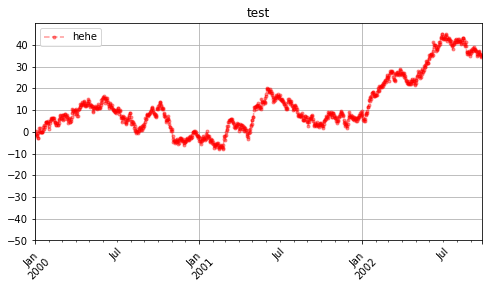

In [14]:
# Series直接生成图表
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
print(ts)
ts.plot(kind='line', 
       label='hehe', 
       style='--g.',
       color='r',
       alpha=0.4,
       use_index=True,
       rot=45,
       grid=True,
       ylim=[-50, 50],
       yticks=list(range(-50, 50, 10)),
       figsize=(8, 4),
       title='test',
       legend=True)
#plt.grid(True, linestyle = "--",color = "gray", linewidth = "0.5",axis = 'x')  # 网格
plt.legend()
# Series.plot()：series的index为横坐标，value为纵坐标
# kind → line,bar,barh...（折线图，柱状图，柱状图-横...）
# label → 图例标签，Dataframe格式以列名为label
# style → 风格字符串，这里包括了linestyle（-），marker（.），color（g）
# color → 颜色，有color指定时候，以color颜色为准
# alpha → 透明度，0-1
# use_index → 将索引用为刻度标签，默认为True
# rot → 旋转刻度标签，0-360
# grid → 显示网格，一般直接用plt.grid
# xlim,ylim → x,y轴界限
# xticks,yticks → x,y轴刻度值
# figsize → 图像大小
# title → 图名
# legend → 是否显示图例，一般直接用plt.legend()
# 也可以 → plt.plot()

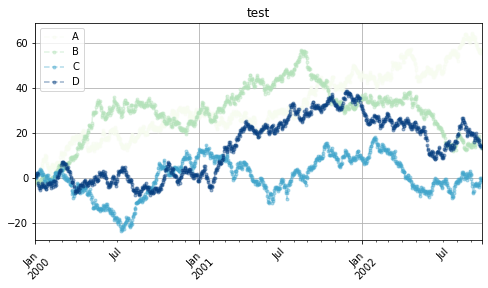

In [15]:
# DataFrame直接生成图表
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
df.plot(kind='line',
       style='--.',
       alpha=0.4,
       use_index=True,
       rot=45,
       grid=True,
       figsize=(8, 4),
       title='test',
       legend=True,
       subplots=False,
       colormap='GnBu')
# subplots是否将各个列绘制到不同的图表